In [14]:
import pandas as pd
df = pd.read_csv('earnings_data_1M.csv')
df.head()

,Ticker,Earnings,Revenue,Percentage change,Market cap,Industry
0,AMRK,24.10,39.44,-13.83,684685376,Capital Markets
1,NTNX,60,3.91,15.41,8357736448,Software—Infrastructure
2,S,46.67,5.61,-0.55,4985063424,Software—Infrastructure
3,MDB,106.67,8.69,-14.09,24675241984,Software—Infrastructure
4,LULU,5.93,1.86,-0.03,48795471872,Apparel Retail


#Data preprocessing

In [15]:
unique_values = df['Industry'].unique()
print(f'Nº Industries: {len(unique_values)}')
industries_dict = {}
for idx, industry in enumerate(unique_values):
  industries_dict[industry] = idx
for index in df.index:
    # Perform some operation to change the value (e.g., double the value)
    new_value = industries_dict[df.loc[index, 'Industry']]
    # Update the DataFrame with the new value
    df.loc[index, 'Industry'] = new_value
df.head()

Nº Industries: 127


,Ticker,Earnings,Revenue,Percentage change,Market cap,Industry
0,AMRK,24.10,39.44,-13.83,684685376,0
1,NTNX,60,3.91,15.41,8357736448,1
2,S,46.67,5.61,-0.55,4985063424,1
3,MDB,106.67,8.69,-14.09,24675241984,1
4,LULU,5.93,1.86,-0.03,48795471872,2


# Dataframe separation and data normalization

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import imshow
import numpy as np
import keras
import tensorflow as tf
import io
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import r2_score

import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow.keras.backend as K
from keras.optimizers import Adam

In [17]:
industry_column = df['Industry']
df = df.drop(columns=['Industry'])

numerical_columns = ['Earnings', 'Revenue', 'Percentage change', 'Market cap']
for col in numerical_columns:
    df[col] = df[col].replace(',', '', regex=True).astype(float)
non_numerical_columns = ['Ticker']
df.drop(columns=non_numerical_columns, inplace=True)
# Choose either MinMaxScaler or StandardScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=numerical_columns)

df = pd.concat([df, industry_column], axis=1)

df = df.dropna(axis=0)
df = df.dropna()
print(df.head())

number_of_rows_df = len(df.index)
train_data, temp_data = train_test_split(df, test_size=0.9, random_state=42)
test_data, val_data = train_test_split(temp_data, test_size=0.7, random_state=42)
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)
print("Validation data shape:", val_data.shape)
print("\n")


test_data.to_csv("testing.csv")
train_data.to_csv("training.csv")
val_data.to_csv("validation.csv")

X_testing = test_data.to_numpy()
testing_x = []
for vert_testing in X_testing:
  testing_x.append(vert_testing[:6])
X_testing = pd.DataFrame(data=np.array(testing_x, dtype=np.float32), columns= ['Earnings', 'Revenue', 'Percentage change', 'Market cap', 'Industry'])
y_testing = X_testing.iloc[:, [False, False, True, False, False]]
X_testing = X_testing.iloc[:, [True, True, False, True, True]]

X_train= train_data.to_numpy()
training_x = []
for vert_training in X_train:
  training_x.append(vert_training[:6])
X_train = pd.DataFrame(data=np.array(training_x, dtype=np.float32), columns= ['Earnings', 'Revenue', 'Percentage change', 'Market cap', 'Industry'])
y_train= X_train.iloc[:, [False, False, True, False, False]]
X_train = X_train.iloc[:, [True, True, False, True, True]]

X_val= val_data.to_numpy()
validation_x = []
for vert_validation in X_val:
  validation_x.append(vert_validation[:6])
X_val = pd.DataFrame(data=np.array(validation_x, dtype=np.float32), columns= ['Earnings', 'Revenue', 'Percentage change', 'Market cap', 'Industry'])
y_val= X_val.iloc[:, [False, False, True, False, False]]
X_val = X_val.iloc[:, [True, True, False, True, True]]
print(X_testing)
print(X_val)
print(X_train)

   Earnings   Revenue  Percentage change  Market cap Industry
0  0.394941  0.010165           0.217213    0.000255        0
1  0.398491  0.001008           0.343107    0.003122        1
2  0.397173  0.001446           0.274391    0.001862        1
3  0.403106  0.002240           0.216094    0.009218        1
4  0.393144  0.000479           0.276630    0.018229        2
Training data shape: (340, 5)
Testing data shape: (919, 5)
Validation data shape: (2146, 5)


     Earnings   Revenue  Market cap  Industry
0    0.393581  0.000564    0.003944       3.0
1    0.402447  0.000183    0.000130      49.0
2    0.393864  0.000198    0.002689      49.0
3    0.391379  0.000113    0.001930     102.0
4    0.391543  0.000059    0.001493      55.0
..        ...       ...         ...       ...
914  0.400249  0.000070    0.000117       5.0
915  0.393821  0.000920    0.003452      57.0
916  0.392838  0.000227    0.004948      64.0
917  0.392581  0.000474    0.024994      43.0
918  0.392558  0.004933    0

#-------------------------------*MODELS*---------------------------

#Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X_train = train_data[["Earnings", "Revenue", "Market cap"]]  # Use the relevant columns as features
y_train = train_data["Percentage change"]  # Target variable
print(y_train)
model.fit(X_train, y_train)

X_test = test_data[["Earnings", "Revenue", "Market cap"]]  # Use the same features in testing
y_test = test_data["Percentage change"]

y_pred = model.predict(X_test)
print(y_pred)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(mae)

3159    0.239172
1218    0.369887
1158    0.294067
1415    0.264531
3082    0.311720
          ...   
1095    0.254671
1130    0.292173
1294    0.303496
860     0.318738
3174    0.348101
Name: Percentage change, Length: 340, dtype: float64
[0.26543967 0.26488978 0.26557907 0.26565887 0.2656412  0.2637774
 0.26539114 0.26446883 0.26563558 0.26493887 0.265915   0.26277017
 0.26502848 0.26530962 0.26542792 0.26434022 0.26436144 0.19883988
 0.26618239 0.26541463 0.26447289 0.2728156  0.26354831 0.26511671
 0.27115908 0.26427248 0.26173649 0.26271252 0.26521862 0.26528208
 0.26558116 0.26335733 0.26820779 0.26580114 0.26522433 0.27024545
 0.26495997 0.26381759 0.26735844 0.26542165 0.26673761 0.2673146
 0.26520223 0.26592906 0.26466351 0.26529433 0.26394661 0.26552774
 0.2647783  0.26523077 0.26276921 0.26574068 0.26694651 0.26287352
 0.26535265 0.26540053 0.26461736 0.26577229 0.26745578 0.26588307
 0.26561241 0.26487466 0.2647467  0.26729453 0.26860413 0.26366558
 0.26740448 0.26580858 0.

#SEQUENTIAL NN

      Earnings   Revenue  Market cap  Industry
3159  0.403610  0.001459    0.000131         2
1218  0.395030  0.000943    0.005266        11
1158  0.393804  0.002144    0.040603        31
1415  0.395079  0.000095    0.000855        54
3082  0.391151  0.000010    0.001726       102
...        ...       ...         ...       ...
1095  0.391313  0.001291    0.000035         8
1130  0.392621  0.000925    0.038950        27
1294  0.393438  0.000003    0.001353        17
860   0.395607  0.002546    0.002196        46
3174  0.422224  0.000070    0.000294         1

[340 rows x 4 columns]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                320       
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                            

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


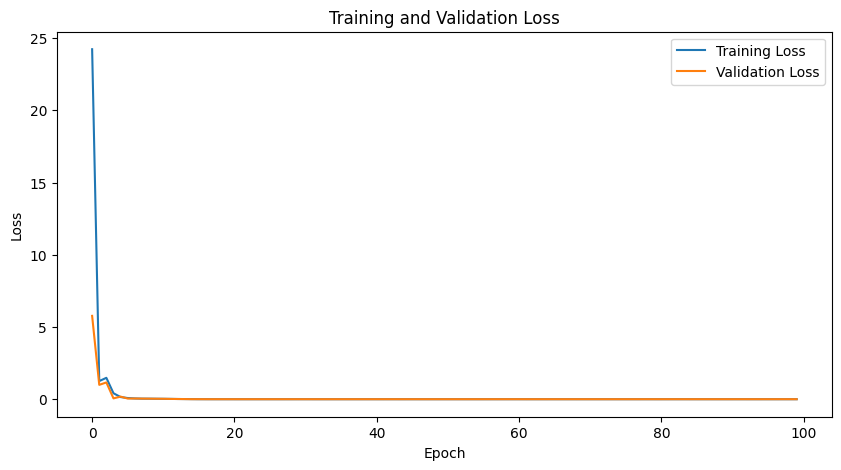

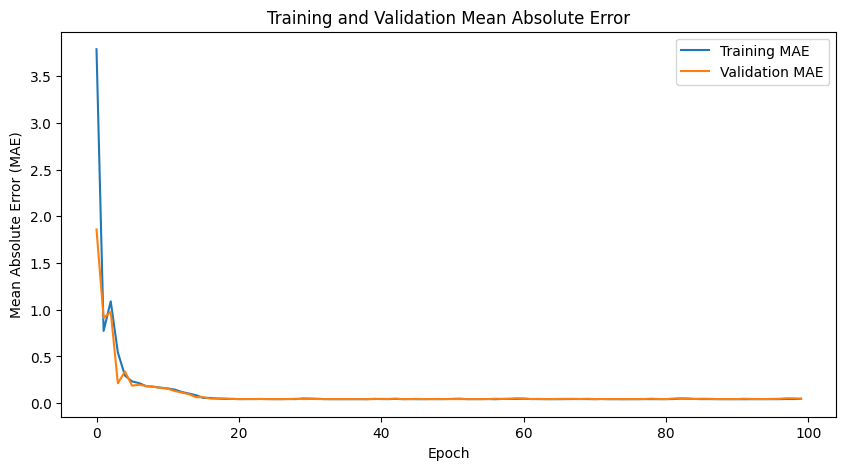

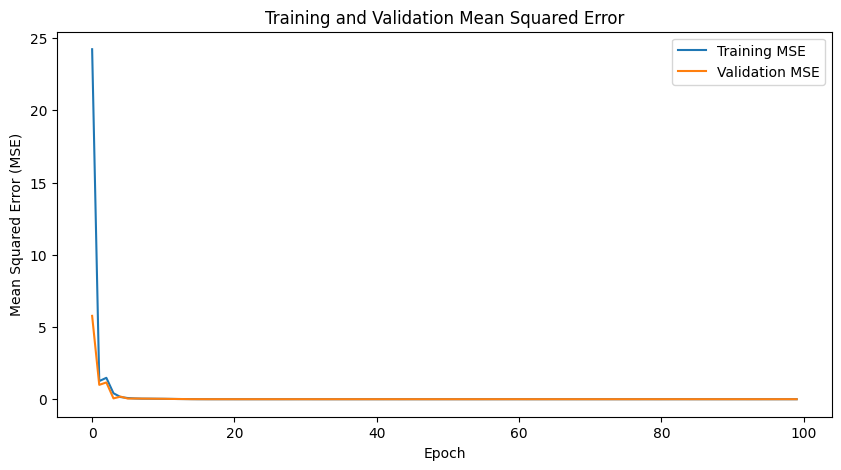

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Load preprocessed data
X_train = pd.read_csv("training.csv", index_col=0)
X_val = pd.read_csv("validation.csv", index_col=0)
y_train = X_train.pop('Percentage change').values
y_val = X_val.pop('Percentage change').values


print(X_train)
# Build the feedforward neural network (MLP) model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

# Print the model summary
model.summary()

# Train the model
EPOCHS = 100
BATCH_SIZE = 32

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=(X_val, y_val)
)

model.save("sequential_nn_1M.h5")

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation mean absolute error
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation Mean Absolute Error')
plt.legend()
plt.show()

# Plot training and validation mean squared error
plt.figure(figsize=(10, 5))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation Mean Squared Error')
plt.legend()
plt.show()

#SEQUENTIAL NN

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Load preprocessed data
X_train = pd.read_csv("training.csv", index_col=0)
X_val = pd.read_csv("validation.csv", index_col=0)
y_train = X_train.pop('Percentage change').values
y_val = X_val.pop('Percentage change').values


print(X_train)
# Build the feedforward neural network (MLP) model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

# Print the model summary
model.summary()

# Train the model
EPOCHS = 100
BATCH_SIZE = 32

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=(X_val, y_val)
)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation mean absolute error
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation Mean Absolute Error')
plt.legend()
plt.show()

# Plot training and validation mean squared error
plt.figure(figsize=(10, 5))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation Mean Squared Error')
plt.legend()
plt.show()

      Earnings   Revenue  Market cap  Industry
3159  0.403610  0.001459    0.000131         2
1218  0.395030  0.000943    0.005266        11
1158  0.393804  0.002144    0.040603        31
1415  0.395079  0.000095    0.000855        54
3082  0.391151  0.000010    0.001726       102
...        ...       ...         ...       ...
1095  0.391313  0.001291    0.000035         8
1130  0.392621  0.000925    0.038950        27
1294  0.393438  0.000003    0.001353        17
860   0.395607  0.002546    0.002196        46
3174  0.422224  0.000070    0.000294         1

[340 rows x 4 columns]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                320       
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                            

KeyboardInterrupt: ignored

#LSTM

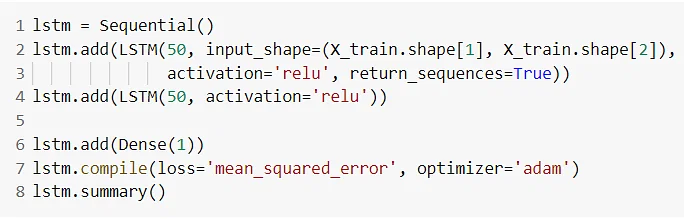

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM

print(X_train.shape)
lstm = Sequential()
lstm.add(LSTM(50, input_shape=X_train.shape[1], activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu'))

lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

(71, 4)


TypeError: ignored

#Testing

In [22]:
# Load preprocessed testing data
X_test = pd.read_csv("testing.csv", index_col=0)
y_test = X_test.pop('Percentage change').values

# Evaluate the model on the testing data
test_loss, test_mae, test_mse = model.evaluate(X_test, y_test, verbose=1)

print("Testing Loss:", test_loss)
print("Testing MAE:", test_mae)
print("Testing MSE:", test_mse)


model.save("earnings_model.h5")

29/29 [==============================] - 0s 3ms/step - loss: 0.0038 - mae: 0.0451 - mse: 0.0038
Testing Loss: 0.0038361952174454927
Testing MAE: 0.04510900378227234
Testing MSE: 0.0038361952174454927


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
from keras.models import load_model

# Load the model
loaded_model = load_model("sequential_nn_1M.h5")

new_data = pd.read_csv("testing_1M.csv")  # Replace with the actual filename
print(industries_dict)
for index in new_data.index:
    # Perform some operation to change the value (e.g., double the value)
    new_value = industries_dict[new_data.loc[index, 'Industry']]
    # Update the DataFrame with the new value
    new_data.loc[index, 'Industry'] = new_value
print(new_data.head())
numerical_columns = ['Earnings', 'Revenue', 'Percentage change', 'Market cap']
for col in numerical_columns:
    new_data[col] = new_data[col].replace(',', '', regex=True).astype(float)

non_numerical_columns = ['Ticker']
new_data.drop(columns=non_numerical_columns, inplace=True)

industry_column = new_data["Industry"]
new_data = new_data.drop(columns=['Industry'])
scaled_data = scaler.transform(new_data)
new_data = pd.DataFrame(scaled_data, columns=numerical_columns)

new_data = pd.concat([new_data, industry_column], axis=1)
print(new_data.head())

X_new= new_data.to_numpy()
new_x = []
for vert_new in X_new:
  new_x.append(vert_new[:6])
X_new = pd.DataFrame(data=np.array(new_x, dtype=np.float32), columns= ['Earnings', 'Revenue', 'Percentage change', 'Market cap', 'Industry'])
y_new= X_new.iloc[:, [False, False, True, False, False]]
X_new = X_new.iloc[:, [True, True, False, True, True]]

predictions = loaded_model.predict(X_new)

# Print the predictions
print(predictions)

print(y_new)

{'Capital Markets': 0, 'Software—Infrastructure': 1, 'Apparel Retail': 2, 'Software—Application': 3, 'Packaged Foods': 4, 'Communication Equipment': 5, 'Luxury Goods': 6, 'Internet Retail': 7, 'Specialty Retail': 8, 'Apparel Manufacturing': 9, 'Computer Hardware': 10, 'Semiconductor Equipment & Materials': 11, 'Security & Protection Services': 12, 'Drug Manufacturers—Specialty & Generic': 13, 'Specialty Industrial Machinery': 14, 'Education & Training Services': 15, 'Department Stores': 16, 'Semiconductors': 17, 'Electronic Components': 18, 'Banks—Diversified': 19, 'Oil & Gas Midstream': 20, 'Textile Manufacturing': 21, 'Telecom Services': 22, 'Leisure': 23, 'Furnishings, Fixtures & Appliances': 24, 'Electronics & Computer Distribution': 25, 'Discount Stores': 26, 'Medical Devices': 27, 'Household & Personal Products': 28, 'Home Improvement Retail': 29, 'Biotechnology': 30, 'Farm & Heavy Construction Machinery': 31, 'Information Technology Services': 32, 'Scientific & Technical Instrum